## Projekt - Chemisches Rauschen

Chemische Reaktionen finden zwischen einzelnen Teilchen statt. Die Anzahl verschiedener
Teilchen in einem System ist hierbei aus der Menge der natuerlichen Zahlen. Wird ein Teilchen
umgewandelt verringert sich die Anzahl der entsprechenden Teilchensorte und die Anzahl
der Teilchen des Reaktionsproduktes erhoeht sich. Die Zeitpunkte an denen diese Uebergaenge
stattfinden sind zufaellig. Nichtsdestotrotz werden chemische Reaktionen oft sehr genau durch
Differentialgleichungen fuer die Konzentrationen der Stoffe beschrieben. In diesem Projekt
sollen der Gillespie Algorithmus zur stochastischen Simulation von chemischen Reaktionen
erarbeitet, und einige der Simulationen in den urspruenglichen Artikeln [1, 2] nachvollzogen
werden. 

Belesen Sie sich zunaechst zu den Themen *chemische Kinetik*, *Gillespie Algorithmus*,
*Exponential-* und *Gammaverteilung* und schauen Sie sich die Artikel [1, 2] an!

### Aufgaben

#### Beispiel 1 : Radioaktiver Zerfall

Als erstes wollen wir radioaktiven Zerfall der Form

$$
R_0 : A \to B
$$

betrachten. 
- Wie lautet die Differentialgleichung fuer die Konzentration $a = N_A/V$ des radioaktiven
Stoffes $A$? Wie lautet die Loesung dieser Differentialgleichung? 
- Wie groß ist die Uebergangsrate $r_0(N_A,k_0,V)$? 
- Simulieren Sie den zufaelligen radioaktiven Zerfall fuer verschiedene Anfangswerte $N_A(t = 0) \in \{10^1, 10^2, \dots , 10^6\}$ mehrmals und ploten Sie fuer jedes $N_A(0)$ den Anteil $N_A(t)/N_A(0)$ der nicht zerfallenen Teilchen als Funktion der Zeit. 
- Vergleichen Sie diese Simulationsdaten mit der Loesung $a(t)/a(0)$ der Differentialgleichung (z.B. im selben Plot).

**Zusatzaufgabe:** 
- Bestimmen Sie die mittlere Zeit $T_{stop}$, die das System braucht, bis alle
Teilchen zerfallen sind, und die Varianz $\sigma_{stop}^2$ dieser Zeit. Welcher Zusammenhang existiert
zwischen den Groessen $T_{stop}$, $\sigma_{stop}^2$ und $N_A(0)$? 

*Hinweis:* $T_{stop}$ ist der Maximalwert aus $N_A(0)$ identisch und unabhaengig, exponentiell verteilten Zufallsvariablen.

In [4]:
import numpy as np
%matplotlib inline
from pylab import *

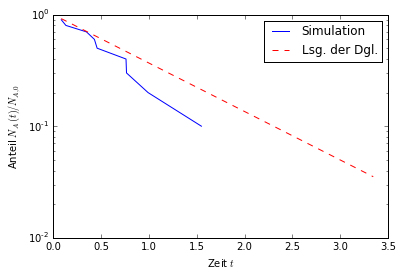

In [5]:
V = 1
nA0 = 10
nB0 = 0
n0 = np.array([nA0, nB0])
nu0 = np.array([-1, +1])
nu = [nu0]
k0 = 1
k = [k0]
t_max = 1000

def calculate_r(n, k, V):
    r0 = V * n[0] * k[0]
    r = [r0]
    return r

def reaction(V, n0, nu, k, t_max):
    t = 0
    n = n0

    while n[0]>0:
        r = calculate_r(n, k, V)
        r_tot = sum(r)
        if r_tot==0:
            break
        dt = np.random.exponential(scale = 1/r_tot)
        t = t+dt
        i = np.random.rand()
        i = np.argmax(i<np.cumsum(r)/r_tot)
        n = n + nu[i]
        yield t, n
        
t, n = zip(*list(reaction(V, n0, nu, k, t_max)))
n = np.array(n).T
t = np.array(t)
semilogy(t,n[0]/n0[0], label="Simulation")
semilogy(t,(nA0 * exp(-k0 * t))/n0[0], 'r--', label="Lsg. der Dgl.")
legend(loc=0)
xlabel("Zeit $t$")
ylabel("Anteil $N_A(t)/N_{A, 0}$")
#savefig('A1n10000.pdf')

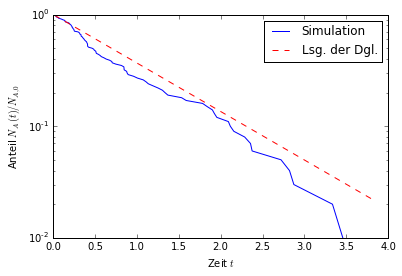

In [6]:
nA0 = 100
n0 = np.array([nA0, nB0])
t, n = zip(*list(reaction(V, n0, nu, k, t_max)))
n = np.array(n).T
t = np.array(t)
semilogy(t,n[0]/n0[0], label="Simulation")
semilogy(t,(nA0 * exp(-k0 * t))/n0[0], 'r--', label="Lsg. der Dgl.")
legend(loc=0)
xlabel("Zeit $t$")
ylabel("Anteil $N_A(t)/N_{A, 0}$")

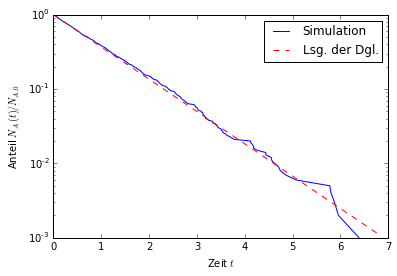

In [7]:
nA0 = 1000
n0 = np.array([nA0, nB0])
t, n = zip(*list(reaction(V, n0, nu, k, t_max)))
n = np.array(n).T
t = np.array(t)
semilogy(t,n[0]/n0[0], label="Simulation")
semilogy(t,(nA0 * exp(-k0 * t))/n0[0], 'r--', label="Lsg. der Dgl.")
legend(loc=0)
xlabel("Zeit $t$")
ylabel("Anteil $N_A(t)/N_{A, 0}$")

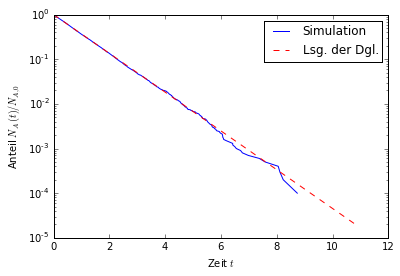

In [8]:
nA0 = 10000
n0 = np.array([nA0, nB0])
t, n = zip(*list(reaction(V, n0, nu, k, t_max)))
n = np.array(n).T
t = np.array(t)
semilogy(t,n[0]/n0[0], label="Simulation")
semilogy(t,(nA0 * exp(-k0 * t))/n0[0], 'r--', label="Lsg. der Dgl.")
legend(loc=0)
xlabel("Zeit $t$")
ylabel("Anteil $N_A(t)/N_{A, 0}$")

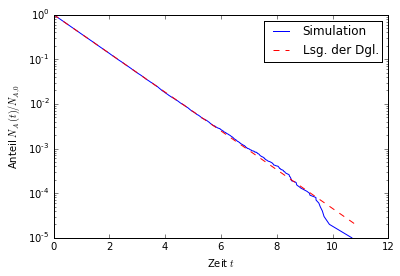

In [10]:
nA0 = 100000
n0 = np.array([nA0, nB0])
t, n = zip(*list(reaction(V, n0, nu, k, t_max)))
n = np.array(n).T
t = np.array(t)
semilogy(t,n[0]/n0[0], label="Simulation")
semilogy(t,(nA0 * exp(-k0 * t))/n0[0], 'r--', label="Lsg. der Dgl.")
legend(loc=0)
xlabel("Zeit $t$")
ylabel("Anteil $N_A(t)/N_{A, 0}$")

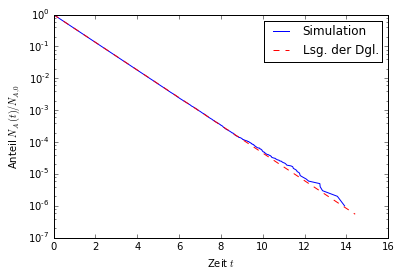

In [11]:
nA0 = 1000000
n0 = np.array([nA0, nB0])
t, n = zip(*list(reaction(V, n0, nu, k, t_max)))
n = np.array(n).T
t = np.array(t)
semilogy(t,n[0]/n0[0], label="Simulation")
semilogy(t,(nA0 * exp(-k0 * t))/n0[0], 'r--', label="Lsg. der Dgl.")
legend(loc=0)
xlabel("Zeit $t$")
ylabel("Anteil $N_A(t)/N_{A, 0}$")